#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**
eight-income-distributions  dataset

version 1.0 2021-05-05

### Import libraries and set folders

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
from mizani.formatters import percent_format
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib.patches import Rectangle

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-vienna-explore/"
output = dirname + "da_case_studies/ch03-hotels-vienna-explore/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

In [4]:
# load vienna
vienna = pd.read_csv(data_in + "hotels-vienna.csv")
#vienna = pd.read_csv("https://osf.io/y6jvb/download")

## Figures 1a and 1b

apply filters: Hotels

In [5]:
vienna["accommodation_type"].value_counts()

accommodation_type
Hotel                  264
Apartment              124
Pension                 16
Guest House              8
Hostel                   6
Bed and breakfast        4
Apart-hotel              4
Vacation home Condo      2
Name: count, dtype: int64

In [6]:
vienna_cut = vienna.loc[vienna["accommodation_type"] == "Hotel"]

In [7]:
vienna_cut_counts = (
    vienna_cut['stars']
    .value_counts(normalize=True)
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'stars', 'proportion': 'percent'})
)
vienna_cut_counts['percent'] *= 100  
new_row = pd.DataFrame({'stars': [1.5], 'percent': [0]})  

vienna_cut_counts = pd.concat([vienna_cut_counts,new_row],ignore_index=True)
vienna_cut_counts = vienna_cut_counts.sort_values(by='stars').reset_index(drop=True)


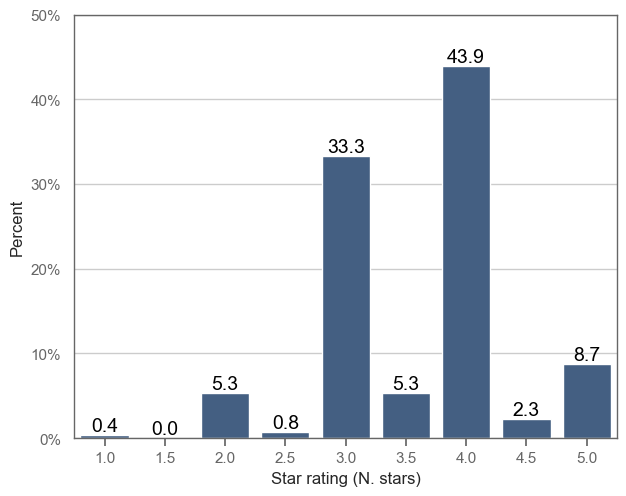

In [8]:

sns.barplot(
    data=vienna_cut_counts,
    x="stars",
    y="percent",
    color=da.color[0],
    alpha=1
)
for index, row in vienna_cut_counts.iterrows():
    plt.text(
        (row['stars'] -1) + index/2,
        row['percent'],
        round(row["percent"],1),
        ha="center",
        va="bottom",
        fontsize=14
    )
plt.xlabel("Star rating (N. stars)")
plt.ylabel("Percent")
plt.ylim(0, 50)
plt.yticks(ticks=np.arange(0, 51, 10), labels=[f"{int(y)}%" for y in np.arange(0, 51, 10)])    
plt.show()

In [9]:
vienna_cut_counts1 = (
    vienna_cut['stars']
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={'index': 'stars', 'count': 'frequency'})
)
new_row = pd.DataFrame({'stars': [1.5], 'frequency': [0]})
vienna_cut_counts1 = pd.concat([vienna_cut_counts1,new_row],ignore_index=True)
vienna_cut_counts1 = vienna_cut_counts1.sort_values(by='stars').reset_index(drop=True)


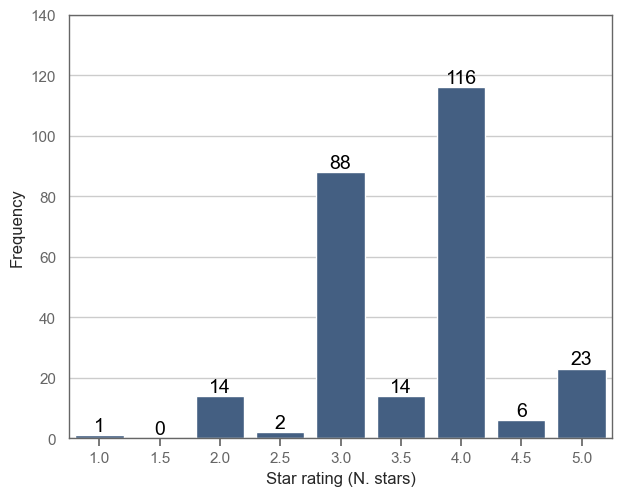

In [10]:
sns.barplot(
    data=vienna_cut_counts1,
    x="stars",
    y="frequency",
    color=da.color[0],
    alpha=1
)
for index, row in vienna_cut_counts1.iterrows():
    plt.text(
        (row['stars'] -1) + index/2,
        row['frequency'],
        int(row["frequency"]),
        ha="center",
        va="bottom",
        fontsize=14
    )
plt.xlabel("Star rating (N. stars)")
plt.ylabel("Frequency")  
plt.ylim(0, 140)
plt.show()

### Distributions

Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value


In [11]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["city_actual"] == "Vienna")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 600)
]

In [12]:
vienna_cut['city'].value_counts()

city
Vienna    207
Name: count, dtype: int64

In [13]:
vienna_cut['stars'].value_counts()

stars
4.0    111
3.0     82
3.5     14
Name: count, dtype: int64

#### Figure 3.2 a)

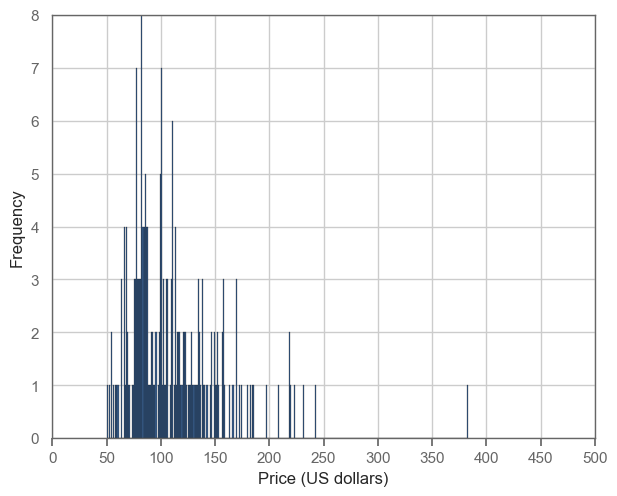

In [14]:

sns.histplot(
    data=vienna_cut,
    x="price",
    binwidth=1,
    edgecolor="black",
    linewidth=0.15,
    color=da.color[0],
    alpha=1
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.xticks(ticks=np.arange(0, 501, 50))
plt.ylim(0,8)  

plt.show()

#### Figure 3.2 b)

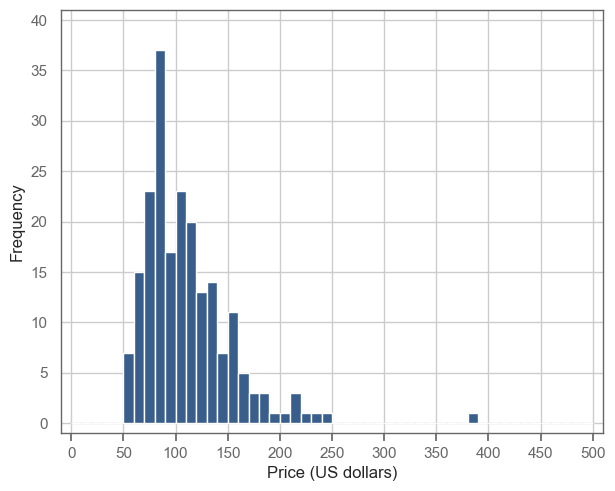

In [15]:
sns.histplot(
    data=vienna_cut,
    x="price",
    binwidth=10,
    binrange=(0,500),
    fill=True,
    color=da.color[0],
    edgecolor="white",
    linewidth=1,
    alpha = 1
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Frequency")
plt.xlim(-10, 510)
plt.xticks(ticks=np.arange(0, 501, 50))
plt.ylim(-1, 41)
plt.yticks(ticks=np.arange(0, 41, 5))
plt.show()

### Figure 3 a,b

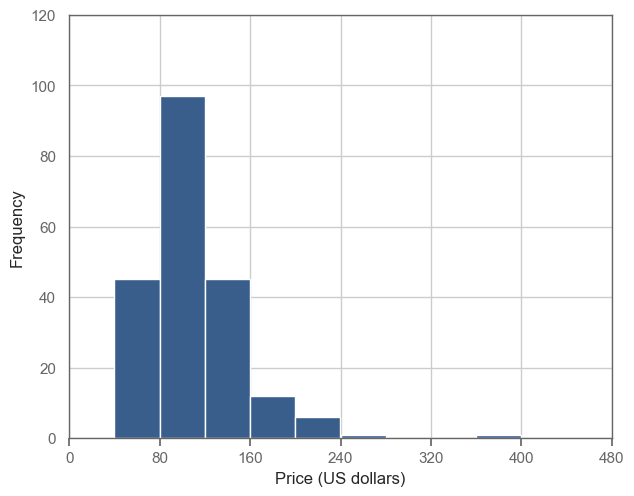

In [16]:
vienna_cut_sns = vienna_cut[vienna_cut["price"]<=480]

sns.histplot(
    data=vienna_cut,
    x="price",
    binwidth=40,
    binrange=(0,480),
    color=da.color[0],
    alpha = 1
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Frequency")
plt.xlim(0, 480)
plt.xticks(ticks=np.arange(0, 481, 80))
plt.ylim(0, 120)
plt.yticks(ticks=np.arange(0, 121, 20))
plt.show()

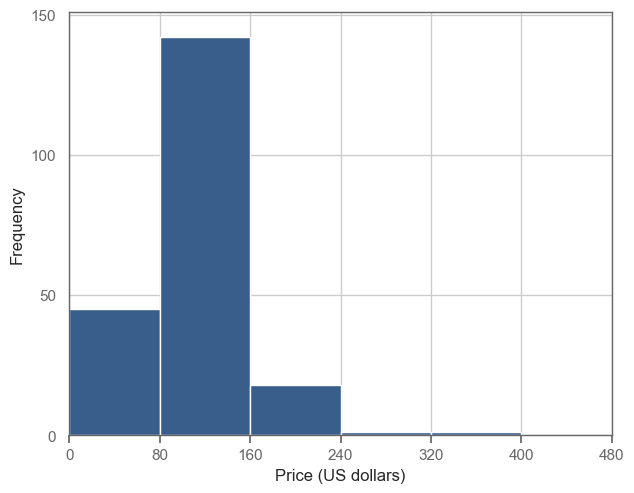

In [17]:

sns.histplot(
    data=vienna_cut,
    x="price",
    binwidth=80,
    binrange=(0,480),
    color=da.color[0],
    alpha = 1
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Frequency")
plt.xlim(0, 480)
plt.xticks(ticks=np.arange(0, 481, 80))
plt.ylim(0, 151)
plt.yticks(ticks=np.arange(0, 151, 50))
plt.show()

### Extreme values

Apply filters: 3-4 stars, less than 8miles from center, without 1000 euro extreme value


In [18]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
    & (vienna["price"] <= 1000)
]

####  Figure 3.4

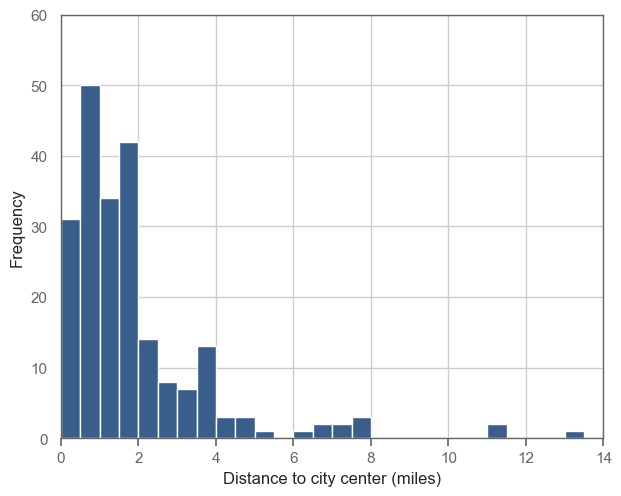

In [ ]:
sns.histplot(
    data=vienna_cut,
    x="distance",
    binwidth=0.5,
    binrange=(0,14),
    fill=True,
    color=da.color[0],
    edgecolor="white",
    linewidth=1,
    alpha = 1
)

plt.xlabel("Distance to city center (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 14)
plt.xticks(ticks=np.arange(0, 15, 2)) 
plt.ylim(0, 60)
plt.yticks(ticks=np.arange(0, 61, 10))
plt.show()

with annotation

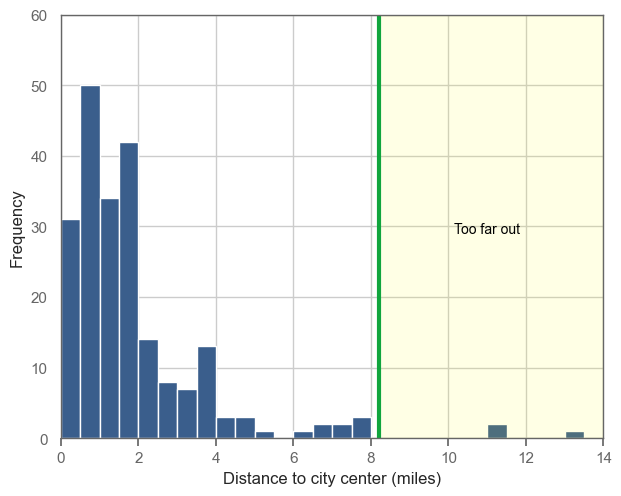

In [20]:
sns.histplot(
    data=vienna_cut,
    x="distance",
    binwidth=0.5,
    binrange=(0,14),
    fill=True,
    color=da.color[0],
    edgecolor="white",
    linewidth=1,
    alpha = 1
)


plt.axvline(x=8.2, color=da.color[1], linewidth=3, linestyle='-')
plt.text(11, 29, "Too far out", fontsize=10, color="black", ha='center')
current_axis = plt.gca()
current_axis.add_patch(
    Rectangle((8.2, 0), width=14-8.2, height=60, alpha=0.1, color="yellow")
)

plt.xlabel("Distance to city center (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 14)
plt.xticks(ticks=np.arange(0, 15, 2))  # Tick intervals of 2 on x-axis
plt.ylim(0, 60)
plt.yticks(ticks=np.arange(0, 61, 10))  # Tick intervals of 10 on y-axis
plt.show()

 look at actual city

In [21]:
vienna_cut['city_actual'].value_counts()

city_actual
Vienna        207
Schwechat       7
Voesendorf      2
Fischamend      1
Name: count, dtype: int64

 ### Figure price with extreme
 Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value

In [22]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (vienna["stars"].notna())
]

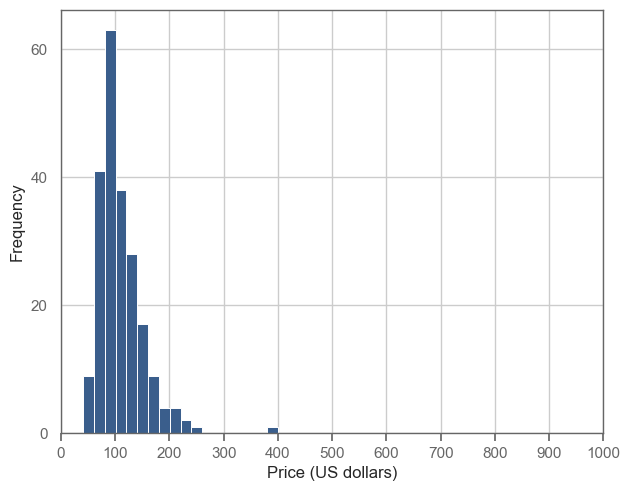

In [23]:
sns.histplot(
    data=vienna_cut,
    x="price",
    binwidth=20,
    binrange=(1,1000),
    color=da.color[0],
    edgecolor="white",
    alpha = 1
)

plt.xlabel("Price (US dollars)")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.xticks(ticks=np.arange(0, 1001, 100)) 
plt.yticks(ticks=np.arange(0, 61, 20)) 
plt.show()